In [2]:
import pandas as pd
import numpy as np
import vaex as vx
import matplotlib.pyplot as plt
import seaborn as sns
import time
from multiprocessing import Process
import gc


plt.rcParams['font.sans-serif'] =['SimHei']
plt.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option("display.max_colwidth", 9999)
vx.settings.display.max_columns = 200
vx.settings.display.max_rows = 100
vx.settings.max_colwidth=60000
pd.set_option('display.float_format',lambda x : '%.4f' % x)
np.set_printoptions(suppress=True) #
pd.options.display.float_format = '{:.4f}'.format
%matplotlib inline

In [ ]:
'''
sns.lineplot(x=None,y=None,hue=None,size=None,style=None,data=None,palette=None,hue_order=None,hue_norm=None,sizes=None,
size_order=None,size_norm=None,dashes=True,markers=None,style_order=None,units=None,estimator='mean',ci=95,n_boot=1000,sort=True,
err_style='band',err_kws=None,legend='brief',ax=None,**kwargs)
data:must
x,y:
hue: group
size: 
palette:  set hue group color
hue_order: list (hue order)
hue_norm: tuple or Normalize
sizes: tuple or list 

'''

In [66]:
path = '../data/'
csv_name = 'diabets.csv'
df = pd.read_csv(path+csv_name)

In [9]:
print(df.shape)
print(df.columns)

(442, 11)
Index(['Unnamed: 0', 'age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5',
       's6'],
      dtype='object')


In [10]:
df.head(2)

,Unnamed: 0,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0,0.0381,0.0507,0.0617,0.0219,-0.0442,-0.0348,-0.0434,-0.0026,0.0199,-0.0176
1,1,-0.0019,-0.0446,-0.0515,-0.0263,-0.0084,-0.0192,0.0744,-0.0395,-0.0683,-0.0922


In [13]:
df.dtypes

Unnamed: 0      int64
age           float64
sex           float64
bmi           float64
bp            float64
s1            float64
s2            float64
s3            float64
s4            float64
s5            float64
s6            float64
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  442 non-null    int64  
 1   age         442 non-null    float64
 2   sex         442 non-null    float64
 3   bmi         442 non-null    float64
 4   bp          442 non-null    float64
 5   s1          442 non-null    float64
 6   s2          442 non-null    float64
 7   s3          442 non-null    float64
 8   s4          442 non-null    float64
 9   s5          442 non-null    float64
 10  s6          442 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 38.1 KB


In [14]:
df.isnull().sum()

Unnamed: 0    0
age           0
sex           0
bmi           0
bp            0
s1            0
s2            0
s3            0
s4            0
s5            0
s6            0
dtype: int64

In [15]:
df.describe()

,Unnamed: 0,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000
mean,220.5000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
std,127.7387,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476
min,0.0000,-0.1072,-0.0446,-0.0903,-0.1124,-0.1268,-0.1156,-0.1023,-0.0764,-0.1261,-0.1378
25%,110.2500,-0.0373,-0.0446,-0.0342,-0.0367,-0.0342,-0.0304,-0.0351,-0.0395,-0.0332,-0.0332
50%,220.5000,0.0054,-0.0446,-0.0073,-0.0057,-0.0043,-0.0038,-0.0066,-0.0026,-0.0019,-0.0011
75%,330.7500,0.0381,0.0507,0.0312,0.0356,0.0284,0.0298,0.0293,0.0343,0.0324,0.0279
max,441.0000,0.1107,0.0507,0.1706,0.1320,0.1539,0.1988,0.1812,0.1852,0.1336,0.1356


In [16]:
df.describe(include='all')

,Unnamed: 0,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000
mean,220.5000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
std,127.7387,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476
min,0.0000,-0.1072,-0.0446,-0.0903,-0.1124,-0.1268,-0.1156,-0.1023,-0.0764,-0.1261,-0.1378
25%,110.2500,-0.0373,-0.0446,-0.0342,-0.0367,-0.0342,-0.0304,-0.0351,-0.0395,-0.0332,-0.0332
50%,220.5000,0.0054,-0.0446,-0.0073,-0.0057,-0.0043,-0.0038,-0.0066,-0.0026,-0.0019,-0.0011
75%,330.7500,0.0381,0.0507,0.0312,0.0356,0.0284,0.0298,0.0293,0.0343,0.0324,0.0279
max,441.0000,0.1107,0.0507,0.1706,0.1320,0.1539,0.1988,0.1812,0.1852,0.1336,0.1356


In [32]:
df.sex.value_counts()

sex
-0.0446    235
0.0507     207
Name: count, dtype: int64

In [68]:
sexCategory = pd.cut(x=df.sex,bins=[-1,0,1],labels=[0,1],include_lowest=True).astype(int)
df['sexCategory'] = sexCategory
df.head(5) # or df[:5]

,Unnamed: 0,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,sexCategory
0,0,0.0381,0.0507,0.0617,0.0219,-0.0442,-0.0348,-0.0434,-0.0026,0.0199,-0.0176,1
1,1,-0.0019,-0.0446,-0.0515,-0.0263,-0.0084,-0.0192,0.0744,-0.0395,-0.0683,-0.0922,0
2,2,0.0853,0.0507,0.0445,-0.0057,-0.0456,-0.0342,-0.0324,-0.0026,0.0029,-0.0259,1
3,3,-0.0891,-0.0446,-0.0116,-0.0367,0.0122,0.0250,-0.0360,0.0343,0.0227,-0.0094,0
4,4,0.0054,-0.0446,-0.0364,0.0219,0.0039,0.0156,0.0081,-0.0026,-0.0320,-0.0466,0


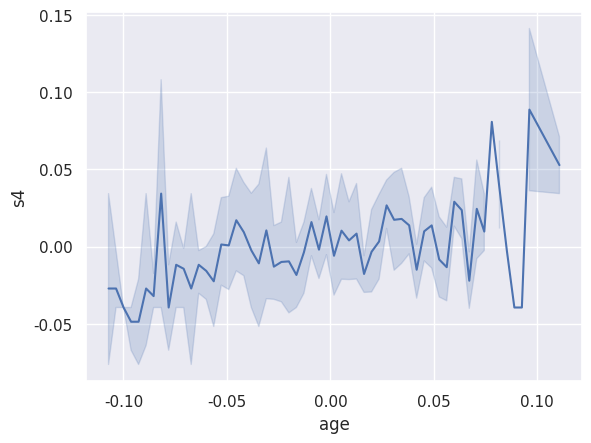

In [70]:
#1.x='age'
sns.set()
ax = sns.lineplot(x='age',y='s4',data=df)
plt.show()

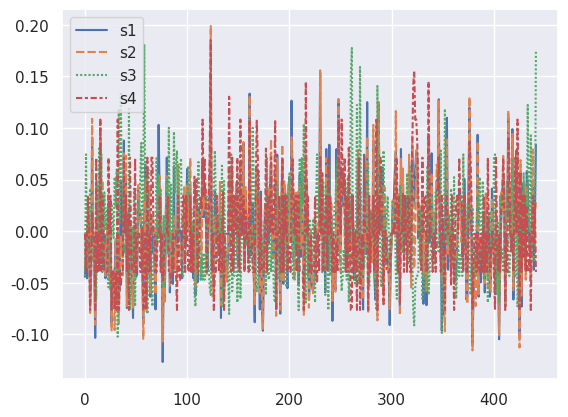

In [71]:
#2
plt.close('all')
dd = [df['s1'],df['s2'],df['s3'],df['s4']]
ax = sns.lineplot(data=dd)
plt.show()

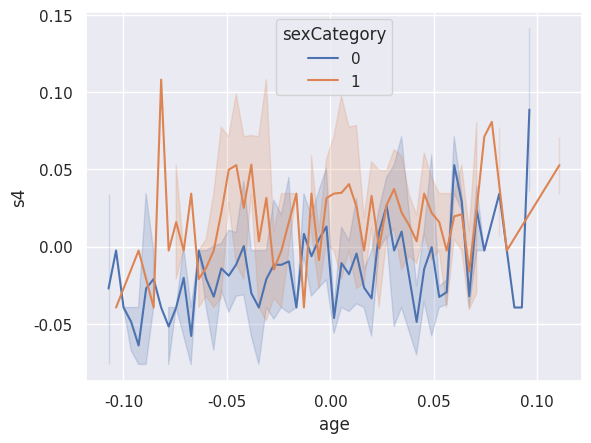

In [72]:
#3.hue='sexCategory'
plt.close('all')
ax = sns.lineplot(x='age',y='s4',hue='sexCategory',data=df)
plt.show()

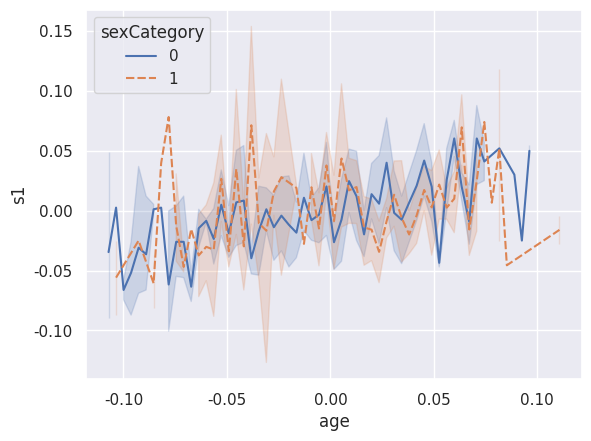

In [73]:
#4. hue='sexCategory',style='sexCategory'
plt.close('all')
ax = sns.lineplot(x='age',y='s1',hue='sexCategory',style='sexCategory',data=df)
plt.show()

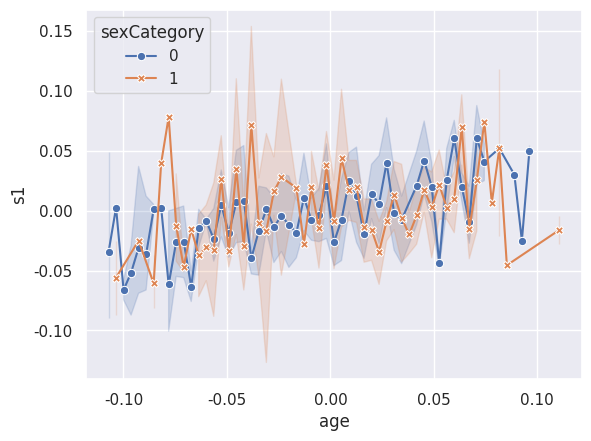

In [74]:
#5 markers=True,dashes=False
plt.close('all')
ax = sns.lineplot(x='age',y='s1',hue='sexCategory',style='sexCategory',markers=True,dashes=False,data=df)
plt.show()

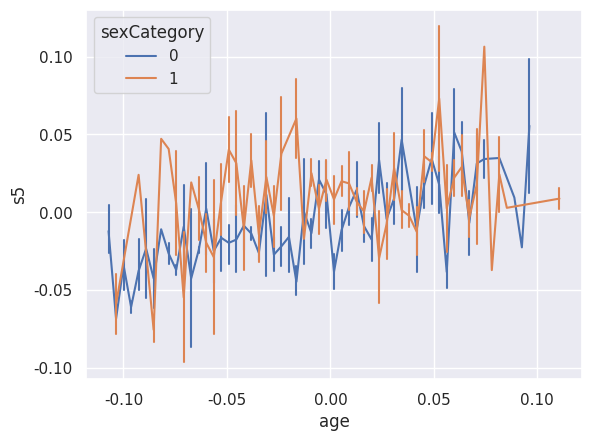

In [76]:
#6 show err bars
plt.close('all')
# ax = sns.lineplot(x='age',y='s5',hue='sexCategory',err_style='bars',ci=68,data=df)
ax = sns.lineplot(x='age',y='s5',hue='sexCategory',err_style='bars',errorbar=('ci',68),data=df)
plt.show()

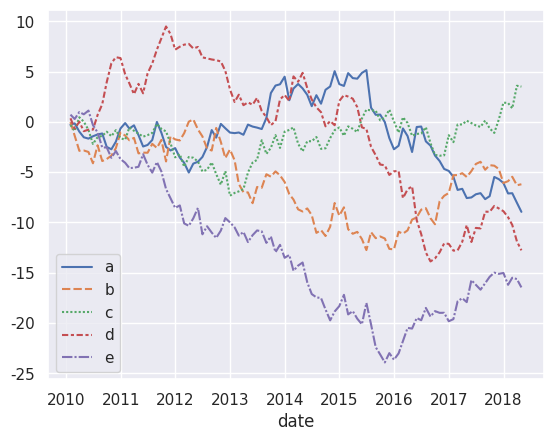

In [78]:
#7 Time Series
plt.close('all')
index = pd.date_range('1 1 2010',periods=100,freq='ME',name='date')
data = np.random.randn(100,5).cumsum(axis=0)
time_df = pd.DataFrame(data,index,['a','b','c','d','e'])
sns.lineplot(data=time_df)
plt.show()
